<a href="https://colab.research.google.com/github/andro095/Data-Mining-Project/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Modelo de Predicción**


---


## **Autores:**


*   ### André Rodríguez 18332
*   ### Cesar Rodas 16776
*   ### Cristina Bautista 161260
*   ### Abril Palencia 18198


---



## **Nota:**

Dado que se trabajó en el proyecto el google colab y se realizarón las contribuciones de los integrantes en el google colab y solo un integrante del grupo era el encargado de actualizar el repo


---

## **Base de datos**

Para obtener la base de datos, hacer clic [aquí](https://bit.ly/2Rqw7NB)


---

## **Tabla de contenidos**



1.   [Sección 1: Extracción de Datos](#scrollTo=c6wPKt2Z0P3Z)
2.   [Sección 2: Depuración de Datos](#scrollTo=8AOfhxDO0KbT)

In [ ]:
import sqlite3 as sql
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# dfs = {}
# con = sql.connect("/content/drive/MyDrive/UVG/4to Año/1er Semestre/Minería de Datos/16va semana/Data Mining Project/Code/basketball.sqlite")

In [ ]:
query = """SELECT G.TEAM_ID_HOME, G.TEAM_ID_AWAY, G.SEASON, CASE WHEN G.WL_HOME = 'W' THEN 0 ELSE 1 END AS WIN
, CASE WHEN TH.abbreviation IS NULL THEN G.TEAM_ABBREVIATION_HOME ELSE TH.abbreviation END abbreviation_home
, CASE WHEN TA.abbreviation IS NULL THEN G.TEAM_ABBREVIATION_AWAY ELSE TA.abbreviation END abbreviation_away
, PAH.height AS height_ph, PAH.weight AS weight_ph, PAH.draft_year AS draft_year_ph, PAH.draft_round AS draft_round_ph, PAH.draft_number AS draft_number_ph, IFNULL(PAH.pts,0) AS pts_ph, IFNULL(PAH.ast,0) AS ast_ph
, PAA.height AS height_pa, PAA.weight AS weight_pa, PAA.draft_year AS draft_year_pa, PAA.draft_round AS draft_round_pa, PAA.draft_number AS draft_number_pa, IFNULL(PAA.pts,0) AS pts_pa, IFNULL(PAA.ast,0) AS ast_pa
FROM Game G
    LEFT OUTER JOIN Team TH ON (G.team_id_home = TH.id)
    LEFT OUTER JOIN Team TA ON (G.team_id_away = TA.id)
    LEFT OUTER JOIN Player_Attributes PAH ON (G.TEAM_ABBREVIATION_HOME = PAH.TEAM_ABBREVIATION AND PAH.from_year >= G.season AND PAH.to_year <= G.season )
    LEFT OUTER JOIN Player_Attributes PAA ON (G.TEAM_ABBREVIATION_AWAY = PAA.TEAM_ABBREVIATION AND PAH.from_year >= G.season AND PAH.to_year <= G.season)
WHERE (PAH.draft_year <> 'Undrafted' AND PAH.draft_year <> 'None')
 AND (PAH.draft_round <> 'Undrafted' AND PAH.draft_round <> 'None')
 AND (PAH.draft_number <> 'Undrafted' AND PAH.draft_number <> 'None')
 AND (PAA.draft_year <> 'Undrafted' AND PAA.draft_year <> 'None')
 AND (PAA.draft_round <> 'Undrafted' AND PAA.draft_round <> 'None')
 AND (PAA.draft_number <> 'Undrafted' AND PAA.draft_number <> 'None')
"""

In [ ]:
# cur = con.cursor()
# cur.execute(query)
# res = cur.fetchall()

In [ ]:
# # Para que me funcione a mi - Cris
from sqlalchemy import create_engine
dfs = {}
engine = create_engine("sqlite:////content/drive/MyDrive/Data Mining Project/Code/basketball.sqlite")
con = engine.connect()
cur = con.execute(query)
res = cur.fetchall()

In [ ]:
df = pd.DataFrame(res)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1610610025,1610612752,1946,0,CHS,NYK,75.0,215.0,1968,12,160,1.8,0.2,71.0,171.0,1987,3,68,2.4,2.0
1,1610610025,1610612752,1946,0,CHS,NYK,75.0,215.0,1968,12,160,1.8,0.2,72.0,180.0,1949,1,7,8.0,5.7
2,1610610025,1610612752,1946,0,CHS,NYK,75.0,215.0,1968,12,160,1.8,0.2,73.0,170.0,1960,3,19,4.6,2.6
3,1610610025,1610612752,1946,0,CHS,NYK,75.0,215.0,1968,12,160,1.8,0.2,73.0,170.0,1966,12,98,1.1,0.8
4,1610610025,1610612752,1946,0,CHS,NYK,75.0,215.0,1968,12,160,1.8,0.2,73.0,175.0,1961,4,33,3.3,1.3


In [ ]:
df.columns = ['teamIdHome', 'teamIdAway', 'season', 'win', 'abbreviation_home', 'abbreviation_away', 'height_ph', 'weight_ph', 'draft_year_ph', 'draft_round_ph', 'draft_number_ph', 'pts_ph', 'ast_ph', 'height_pa', 'weight_pa', 'draft_year_pa', 'draft_round_pa', 'draft_number_pa', 'pts_pa', 'ast_pa']

In [ ]:
df.head()

,teamIdHome,teamIdAway,season,win,abbreviation_home,abbreviation_away,height_ph,weight_ph,draft_year_ph,draft_round_ph,draft_number_ph,pts_ph,ast_ph,height_pa,weight_pa,draft_year_pa,draft_round_pa,draft_number_pa,pts_pa,ast_pa
0,1610610025,1610612752,1946,0,CHS,NYK,75.0,215.0,1968,12,160,1.8,0.2,71.0,171.0,1987,3,68,2.4,2.0
1,1610610025,1610612752,1946,0,CHS,NYK,75.0,215.0,1968,12,160,1.8,0.2,72.0,180.0,1949,1,7,8.0,5.7
2,1610610025,1610612752,1946,0,CHS,NYK,75.0,215.0,1968,12,160,1.8,0.2,73.0,170.0,1960,3,19,4.6,2.6
3,1610610025,1610612752,1946,0,CHS,NYK,75.0,215.0,1968,12,160,1.8,0.2,73.0,170.0,1966,12,98,1.1,0.8
4,1610610025,1610612752,1946,0,CHS,NYK,75.0,215.0,1968,12,160,1.8,0.2,73.0,175.0,1961,4,33,3.3,1.3


In [ ]:
check = df.isnull().values.any()
check

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363488 entries, 0 to 1363487
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   teamIdHome         1363488 non-null  object 
 1   teamIdAway         1363488 non-null  object 
 2   season             1363488 non-null  object 
 3   win                1363488 non-null  int64  
 4   abbreviation_home  1363488 non-null  object 
 5   abbreviation_away  1363488 non-null  object 
 6   height_ph          1363488 non-null  float64
 7   weight_ph          1363488 non-null  float64
 8   draft_year_ph      1363488 non-null  object 
 9   draft_round_ph     1363488 non-null  object 
 10  draft_number_ph    1363488 non-null  object 
 11  pts_ph             1363488 non-null  float64
 12  ast_ph             1363488 non-null  float64
 13  height_pa          1363488 non-null  float64
 14  weight_pa          1363488 non-null  float64
 15  draft_year_pa      1363488 non-n

In [ ]:
seasons = df.season.unique()
teams = df.teamIdHome.unique()

In [ ]:
seasons

array(['1946', '1947', '1948', '1949', '1951', '1952', '1953', '1954',
       '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962',
       '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'], dtype=object)

In [ ]:
teams

array(['1610610025', '1610612744', '1610612752', '1610612765',
       '1610610032', '1610610033', '1610612737', '1610612758',
       '1610610024', '1610612747', '1610612738', '1610612764',
       '1610612741', '1610612745', '1610612756', '1610612749',
       '1610612760', '1610612746', '1610612757', '1610612739',
       '1610612754', '1610612743', '1610612751', '1610612742',
       '1610612748', '1610612750', '1610612761', '1610612755',
       '1610612763', '1610612766', '1610612759', '1610612740',
       '1610612762', '1610612753'], dtype=object)

In [ ]:
dictwlTeam = {}
for team in teams:
  dictwlTeam[team] = {"wins": 0, "loses": 0, "total": 0, "prob": 0.0}

dictwlTeam

{'1610610024': {'loses': 0, 'prob': 0.0, 'total': 0, 'wins': 0},
 '1610610025': {'loses': 0, 'prob': 0.0, 'total': 0, 'wins': 0},
 '1610610032': {'loses': 0, 'prob': 0.0, 'total': 0, 'wins': 0},
 '1610610033': {'loses': 0, 'prob': 0.0, 'total': 0, 'wins': 0},
 '1610612737': {'loses': 0, 'prob': 0.0, 'total': 0, 'wins': 0},
 '1610612738': {'loses': 0, 'prob': 0.0, 'total': 0, 'wins': 0},
 '1610612739': {'loses': 0, 'prob': 0.0, 'total': 0, 'wins': 0},
 '1610612740': {'loses': 0, 'prob': 0.0, 'total': 0, 'wins': 0},
 '1610612741': {'loses': 0, 'prob': 0.0, 'total': 0, 'wins': 0},
 '1610612742': {'loses': 0, 'prob': 0.0, 'total': 0, 'wins': 0},
 '1610612743': {'loses': 0, 'prob': 0.0, 'total': 0, 'wins': 0},
 '1610612744': {'loses': 0, 'prob': 0.0, 'total': 0, 'wins': 0},
 '1610612745': {'loses': 0, 'prob': 0.0, 'total': 0, 'wins': 0},
 '1610612746': {'loses': 0, 'prob': 0.0, 'total': 0, 'wins': 0},
 '1610612747': {'loses': 0, 'prob': 0.0, 'total': 0, 'wins': 0},
 '1610612748': {'loses': 

In [ ]:
for row in df.itertuples():
  if row.win == 0:
    dictwlTeam[row.teamIdHome]["wins"] += 1;
  else:
    dictwlTeam[row.teamIdHome]["loses"] += 1; 
  dictwlTeam[row.teamIdHome]["total"] += 1; 


In [ ]:
dictwlTeam

{'1610610024': {'loses': 1214, 'prob': 0.0, 'total': 2360, 'wins': 1146},
 '1610610025': {'loses': 1018, 'prob': 0.0, 'total': 3531, 'wins': 2513},
 '1610610032': {'loses': 807, 'prob': 0.0, 'total': 1193, 'wins': 386},
 '1610610033': {'loses': 59, 'prob': 0.0, 'total': 436, 'wins': 377},
 '1610612737': {'loses': 29520, 'prob': 0.0, 'total': 72832, 'wins': 43312},
 '1610612738': {'loses': 16670, 'prob': 0.0, 'total': 48742, 'wins': 32072},
 '1610612739': {'loses': 27246, 'prob': 0.0, 'total': 48198, 'wins': 20952},
 '1610612740': {'loses': 1042, 'prob': 0.0, 'total': 3143, 'wins': 2101},
 '1610612741': {'loses': 15187, 'prob': 0.0, 'total': 36903, 'wins': 21716},
 '1610612742': {'loses': 19382, 'prob': 0.0, 'total': 34714, 'wins': 15332},
 '1610612743': {'loses': 11182, 'prob': 0.0, 'total': 38150, 'wins': 26968},
 '1610612744': {'loses': 53153, 'prob': 0.0, 'total': 118952, 'wins': 65799},
 '1610612745': {'loses': 13955, 'prob': 0.0, 'total': 42337, 'wins': 28382},
 '1610612746': {'lo

In [ ]:
for team in teams:
  dictwlTeam[team]["prob"] = dictwlTeam[team]["wins"] / dictwlTeam[team]["total"]

In [ ]:
prob = [0.0] * len(df)
df['probWin'] = prob
for row in df.itertuples():
  df.at[row.Index, 'probWin'] = dictwlTeam[row.teamIdHome]['prob']

In [ ]:
df.probWin

0          0.711696
1          0.711696
2          0.711696
3          0.711696
4          0.711696
             ...   
1363483    0.585683
1363484    0.585683
1363485    0.585683
1363486    0.585683
1363487    0.585683
Name: probWin, Length: 1363488, dtype: float64

In [ ]:
df.head()

,teamIdHome,teamIdAway,season,win,abbreviation_home,abbreviation_away,height_ph,weight_ph,draft_year_ph,draft_round_ph,draft_number_ph,pts_ph,ast_ph,height_pa,weight_pa,draft_year_pa,draft_round_pa,draft_number_pa,pts_pa,ast_pa,probWin
0,1610610025,1610612752,1946,0,CHS,NYK,75.0,215.0,1968,12,160,1.8,0.2,71.0,171.0,1987,3,68,2.4,2.0,0.711696
1,1610610025,1610612752,1946,0,CHS,NYK,75.0,215.0,1968,12,160,1.8,0.2,72.0,180.0,1949,1,7,8.0,5.7,0.711696
2,1610610025,1610612752,1946,0,CHS,NYK,75.0,215.0,1968,12,160,1.8,0.2,73.0,170.0,1960,3,19,4.6,2.6,0.711696
3,1610610025,1610612752,1946,0,CHS,NYK,75.0,215.0,1968,12,160,1.8,0.2,73.0,170.0,1966,12,98,1.1,0.8,0.711696
4,1610610025,1610612752,1946,0,CHS,NYK,75.0,215.0,1968,12,160,1.8,0.2,73.0,175.0,1961,4,33,3.3,1.3,0.711696


In [ ]:
df.teamIdAway = df.teamIdAway.apply(pd.to_numeric)
df.teamIdHome = df.teamIdHome.apply(pd.to_numeric)
df.season = df.season.apply(pd.to_numeric)
df.height_ph = df.height_ph.apply(pd.to_numeric)
df.weight_ph = df.weight_ph.apply(pd.to_numeric)
df.draft_year_ph = df.draft_year_ph.apply(pd.to_numeric)
df.draft_round_ph = df.draft_round_ph.apply(pd.to_numeric)
df.draft_number_ph = df.draft_number_ph.apply(pd.to_numeric)
df.pts_ph = df.pts_ph.apply(pd.to_numeric)
df.ast_ph = df.ast_ph.apply(pd.to_numeric)
df.height_pa = df.height_pa.apply(pd.to_numeric)
df.weight_pa = df.weight_pa.apply(pd.to_numeric)
df.draft_year_pa = df.draft_year_pa.apply(pd.to_numeric)
df.draft_round_pa = df.draft_round_pa.apply(pd.to_numeric)
df.draft_number_pa = df.draft_number_pa.apply(pd.to_numeric)
df.pts_pa = df.pts_pa.apply(pd.to_numeric)
df.ast_pa = df.ast_pa.apply(pd.to_numeric)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363488 entries, 0 to 1363487
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   teamIdHome         1363488 non-null  int64  
 1   teamIdAway         1363488 non-null  int64  
 2   season             1363488 non-null  int64  
 3   win                1363488 non-null  int64  
 4   abbreviation_home  1363488 non-null  object 
 5   abbreviation_away  1363488 non-null  object 
 6   height_ph          1363488 non-null  float64
 7   weight_ph          1363488 non-null  float64
 8   draft_year_ph      1363488 non-null  int64  
 9   draft_round_ph     1363488 non-null  int64  
 10  draft_number_ph    1363488 non-null  int64  
 11  pts_ph             1363488 non-null  float64
 12  ast_ph             1363488 non-null  float64
 13  height_pa          1363488 non-null  float64
 14  weight_pa          1363488 non-null  float64
 15  draft_year_pa      1363488 non-n

In [ ]:
linear_reg = LinearRegression()

In [ ]:
X = df[['height_ph', 'weight_ph', 'draft_year_ph', 'pts_ph', 'ast_ph']]
y = df['probWin']

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.33, random_state=42)
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linear_reg.coef_

array([-0.00340923,  0.00031415, -0.00045218, -0.00208323, -0.00017381])

In [ ]:
linear_reg.intercept_

1.6799523319037233

In [ ]:
df.ast_ph.unique()

array([0.2, 0. , 0.8, 0.6, 1.5, 1.8, 1. , 0.7, 0.9, 2.7, 0.5, 1.6, 1.1,
       1.2, 2.9, 0.3, 0.1, 1.4, 0.4, 3.6, 1.3, 1.9, 1.7, 2. , 2.4, 2.2,
       3. , 3.1, 2.5, 2.3, 4.9, 4. , 2.1, 4.7])

In [ ]:
linear_reg.predict([[80, 264, 2021, 2.1, 1.5]])

array([0.57166887])

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# r2_score(linear_reg.predict(X_test), y_test)
r2_score(y_test, linear_reg.predict(X_test))

-0.09962072784061249

# Graficas


In [ ]:
prob_mean = np.mean(df.probWin.values)

In [ ]:
def plot_campo(campo):
  campo_mean = np.mean(campo.values)
  xy = 0
  x2 = 0

  for i in range(len(campo.values)):
    xy += (campo.values[i] - campo_mean) * (df.probWin.values[i] - prob_mean)
    x2 += (campo.values[i] - campo_mean) ** 2
  
  d = xy / x2
  m = prob_mean - (d * campo_mean)

  xmax = np.max(campo.values)
  xmin = np.min(campo.values)

  posx = np.linspace(xmin, xmax, 1000)
  posy = m + d * posx

  plt.figure(figsize=(8,5))
  plt.plot(posx, posy, color='black', linewidth=2)
  plt.scatter(campo.values, df.probWin.values,  alpha=0.7, color ='green')

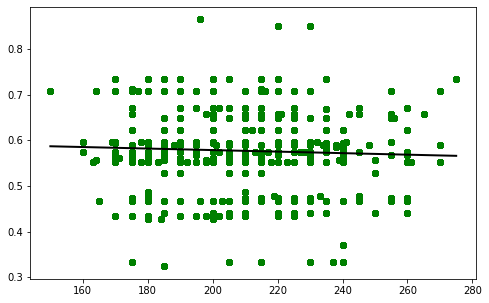

In [ ]:
plot_campo(df.weight_ph)

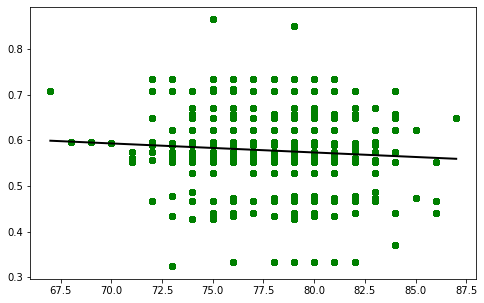

In [ ]:
plot_campo(df.height_ph)

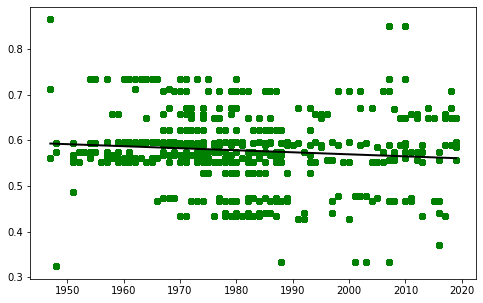

In [ ]:
plot_campo(df.draft_year_ph)

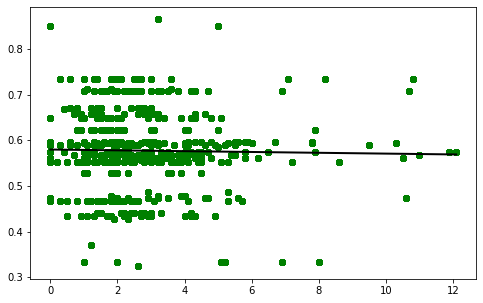

In [ ]:
plot_campo(df.pts_ph)

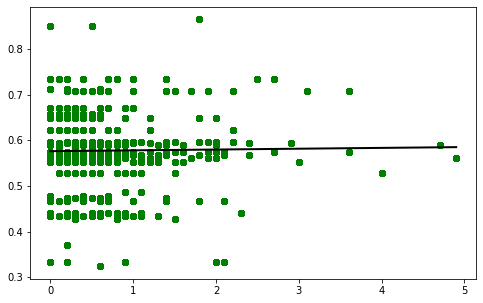

In [ ]:
plot_campo(df.ast_ph)

# Datos especiales


In [ ]:
mean_squared_error(linear_reg.predict(X_test), y_test, squared=False)

0.08178488103729929

In [ ]:
X_test.describe()

,height_ph,weight_ph,draft_year_ph,pts_ph,ast_ph
count,449952.000000,449952.000000,449952.000000,449952.000000,449952.000000
mean,77.981658,207.279214,1981.895720,2.726362,0.649966
std,3.313416,23.827512,16.324309,1.850814,0.684187
min,67.000000,150.000000,1947.000000,0.000000,0.000000
25%,76.000000,190.000000,1970.000000,1.500000,0.200000
50%,78.000000,205.000000,1979.000000,2.300000,0.500000
75%,80.000000,225.000000,1989.000000,3.500000,0.800000
max,87.000000,275.000000,2019.000000,12.100000,4.900000


In [ ]:
Xconst = sm.add_constant(X_test.values)
stat = sm.OLS(y_test, Xconst)
print(stat.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                probWin   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1369.
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        19:30:39   Log-Likelihood:             4.8808e+05
No. Observations:              449952   AIC:                        -9.761e+05
Df Residuals:                  449946   BIC:                        -9.761e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6570      0.016    102.333      0.0

In [ ]:
from sklearn.metrics import classification_report, r2_score

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_regresion = LogisticRegression()

In [ ]:
X = df[['height_ph', 'weight_ph', 'draft_year_ph', 'pts_ph', 'ast_ph']]
y = df['win']

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.33, random_state=42)
log_regresion.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = log_regresion.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.58      0.96      0.73    259292
           1       0.54      0.06      0.11    190660

    accuracy                           0.58    449952
   macro avg       0.56      0.51      0.42    449952
weighted avg       0.56      0.58      0.46    449952



In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score

In [ ]:
print(confusion_matrix(y_test, predictions))

[[249283  10009]
 [178986  11674]]


In [ ]:
roc_auc_score(y_test, predictions)

0.5113140727737142